## Imports

In [25]:
import json
import numpy as np
import matplotlib.pyplot as plt

## Import intensity arrays from .json files

Results for intensity calculations done in Cairo and in Python are each in two separate .json files

In [26]:
# Cairo-calculated intensity data
with open('test_intensity_plot_cairo.json') as json_file_cairo:
    data_cairo = json.load(json_file_cairo)
    
    # Unpack flattened array
    intensity_array_cairo_flattened = np.array(data_cairo[0])
    
    # Find num_pts = (array length)**0.5
    #              = number of points along each side of desired square array
    intensity_array_cairo_flattened_len = len(intensity_array_cairo_flattened)
    num_pts = int(np.sqrt(intensity_array_cairo_flattened_len))
    
    # Declare empty array with dimensions
    intensity_s_cairo = np.empty((num_pts, num_pts))
    
    # Fill array  
    for p in range(0, num_pts):
        for q in range(0, num_pts):
            
            intensity_s_cairo[q, p] = intensity_array_cairo_flattened[q + p * num_pts]
            

# Python-calculated intensity data
with open('test_intensity_plot_python.json') as json_file_python:
    data_python = json.load(json_file_python)
        
    # Declare empty array with dimensions
    intensity_s_python = np.empty((num_pts, num_pts))
    
    # Fill array 
    for p in range(0, num_pts):
        for q in range(0, num_pts):
            
            intensity_s_python[q, p] = data_python[q][p]


## Create plots

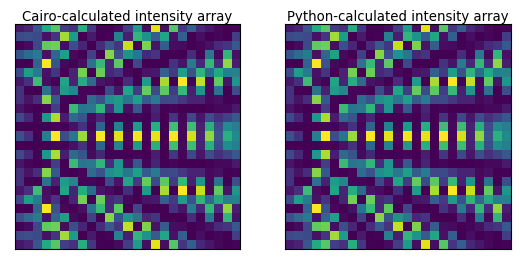

In [27]:
# create a Figure 'fig' and Axes 'ax'. 
# subplots args included (nrows, ncols)
fig, ax_s = plt.subplots(1,2)

# reduce default font size for plots
plt.rcParams.update({'font.size':8})
            
# create plot titles
title_str_cairo = 'Cairo-calculated intensity array'
title_str_python = 'Python-calculated intensity array'

# axes title (reduce pad from default of 6)
ax_s[0].set_title(title_str_cairo, pad=2)
ax_s[1].set_title(title_str_python, pad=2)

# removes subdivisions (ticks) on axes since [] is empty
ax_s[0].set_xticks([])
ax_s[1].set_xticks([])
ax_s[0].set_yticks([])
ax_s[1].set_yticks([])
    
ax_s[0].imshow(intensity_s_cairo, cmap=None)
ax_s[1].imshow(intensity_s_python, cmap=None)

plt.show()